In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
from IPython.display import display, Math, Image

## ベクトル空間

In [3]:
from npmath.space import RealVector, MathSet, IncompatibleElementTypeError, NotInError

V = MathSet(lambda x: RealVector(x, ndim=3) )
v, w = V.take(np.array([1, 2, 3]), np.array([4, 5, 6]))

print(v, w)

print(v + w)
print(w + v)

print(v - w)
print(w - v)

a = 2
print(a * v)
print(v * a)

RealVector([1 2 3]) RealVector([4 5 6])
RealVector([5 7 9])
RealVector([5 7 9])
RealVector([-3 -3 -3])
RealVector([3 3 3])
RealVector([2 4 6])
RealVector([2 4 6])


### ベクトル空間の公理を満たすこと

In [4]:
x, y, z = V.take(np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9]))
zero = V.take(np.zeros(3).astype(np.int32))
x_inv = V.take(-np.array([1, 2, 3]))
a = 2
b = 3

print("(V 1):", (x + y) + z == x + (y + z))
print("(V 2):", x + zero == x)
print("(V 3):", x + x_inv == zero)
print("(V 4) (1):", (a * b) * x == a * (b * x))
print("(V 4) (2):", 1 * x == x)
print("(V 5):", a * (x + y) == (a * x) + (a * y))
print("(V 6):", (a + b) * x == (a * x) + (b * x))

(V 1): [ True  True  True]
(V 2): [ True  True  True]
(V 3): [ True  True  True]
(V 4) (1): [ True  True  True]
(V 4) (2): [ True  True  True]
(V 5): [ True  True  True]
(V 6): [ True  True  True]


In [5]:
try:
    V.take(np.array([1, 2, 3j]))
except IncompatibleElementTypeError as e:
    print(e)

the input vector contains non real number element


# 計量ベクトル空間

parsing /Users/noppoman/WorkingPlace/program/math/learning-functional-analysis-with-python/notebook/npmath/space.py...


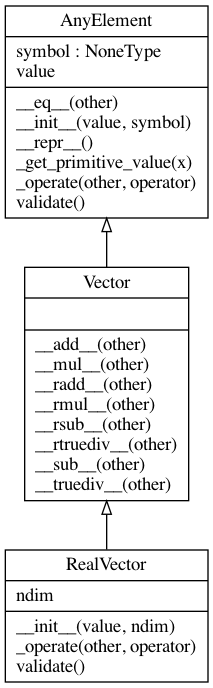

In [6]:
class_name = "RealVector"
!pyreverse -o png -c {class_name} -mn -f ALL -a2 {os.getcwd()}/npmath/space.py
Image(f"./{class_name}.png")

parsing /Users/noppoman/WorkingPlace/program/math/learning-functional-analysis-with-python/notebook/npmath/space.py...


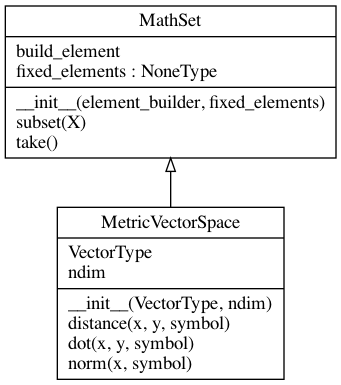

In [7]:
class_name = "MetricVectorSpace"
!pyreverse -o png -c {class_name} -mn -f ALL {os.getcwd()}/npmath/space.py
Image(f"./{class_name}.png")

In [8]:
from npmath.space import MetricVectorSpace

V = MetricVectorSpace(RealVector, ndim=3)
x, y = V.take(np.array([1, 2, 3]), np.array([4, 5, 6]))

print(x, y)
print("<x, y>:   ", V.dot(x, y))
print("‖x‖:    ", V.norm(x))
print("‖y‖:    ", V.norm(y))
print("‖x - y‖:", V.distance(x, y))

RealVector([1 2 3]) RealVector([4 5 6])
<x, y>:    32
‖x‖:     3.7416573867739413
‖y‖:     8.774964387392123
‖x - y‖: 5.196152422706632


## ユニタリ空間

In [9]:
np.array([1j, 2j, 3j]).dtype

dtype('complex128')

In [10]:
from npmath.space import Vector, MetricVectorSpace

class ComplexVector(Vector):
    def __init__(self, value, ndim):
        self.ndim = ndim
        super().__init__(value)
    
    def validate(self):
        if type(self.value) is not np.ndarray:
            raise IncompatibleElementTypeError(f"element type should be a numpy.ndarray. not <{type(self.value).__name__}>")        
        
        # ベクトルの成分が複素数であるか
        if self.value.dtype != np.complex:
            raise IncompatibleElementTypeError(f"the input vector contains non complex number element")
            
        if self.ndim != self.value.shape[0]:
            raise NdimMismachedError(f"n-dim mismatched: {self.ndim}, {self.value.shape[0]}")
    
    def _operate(self, other, operator):
        operate_func = getattr(self.value, operator, None)
        return self.__class__(operate_func(self._get_primitive_value(other)), ndim=self.ndim)
    
# ユニタリ空間    
U = MetricVectorSpace(ComplexVector, ndim=3)
x, y = U.take(np.array([1j, 2, 3]), np.array([4j, 5, 6j]))

print(x, y)
print("<x, y>:   ", U.dot(x, y))
print("‖x‖:    ", U.norm(x))
print("‖y‖:    ", U.norm(y))
print("‖x - y‖:", U.distance(x, y))

ComplexVector([0.+1.j 2.+0.j 3.+0.j]) ComplexVector([0.+4.j 5.+0.j 0.+6.j])
<x, y>:    (14+18j)
‖x‖:     3.7416573867739413
‖y‖:     8.774964387392123
‖x - y‖: 7.937253933193772
